In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import statsmodels.stats.api as sms
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# Regression on Airbnb Price

In [2]:
airbnb_data = pd.read_csv("cleaned_data/airbnb_model_data_clean.csv", index_col=0)

In [3]:
airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233369 entries, 0 to 233368
Data columns (total 49 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Unnamed: 0                        233369 non-null  int64  
 1   last_scraped                      233369 non-null  object 
 2   id                                233369 non-null  int64  
 3   host_id                           233369 non-null  int64  
 4   host_is_superhost                 233369 non-null  int64  
 5   host_listings_count               233369 non-null  float64
 6   zipcode                           233369 non-null  float64
 7   latitude                          233369 non-null  float64
 8   longitude                         233369 non-null  float64
 9   accommodates                      233369 non-null  int64  
 10  bathrooms                         233369 non-null  float64
 11  beds                              233369 non-null  f

## Prepare Data for Modeling

In [4]:
# Create summary function to quickly show statsmodel summary output.

def linreg_summary(X_train, y_train):
    X_int = sm.add_constant(X_train)
    model = sm.OLS(y_train, X_int).fit()
    return model.summary()

In [6]:
# set up variables and drop non numerical columns
y = airbnb_data['price']
X = airbnb_data.drop(['last_scraped', 'id','host_id','price'], axis=1)

In [12]:
# perform train-test split using a test size of 20%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Run Baseline Model

In [13]:
# perform linear regression in scikitlearn
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [14]:
metrics.r2_score(y_train, y_hat_train)

0.19155765060409935

In [15]:
linreg_summary(X_train,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     982.8
Date:                Wed, 31 Mar 2021   Prob (F-statistic):               0.00
Time:                        10:46:17   Log-Likelihood:            -1.3974e+06
No. Observations:              186695   AIC:                         2.795e+06
Df Residuals:                  186649   BIC:                         2.795e+06
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                             1.643e+04   4747.189      3.461      0.001    7123.271    2.57e+04
Unnamed: 0                        3.691e-06    1.5e-05      0.247      0.805   -2.56e-05     3.3e-05
host_is_superhost                    4.5824      2.281      2.009      0.045       0.111       9.054
host_listings_count                  0.3267      0.003     97.065      0.000       0.320       0.333
zipcode                              0.0775      0.039      1.965      0.049       0.000       0.155
latitude                          -124.2108     53.031     -2.342      0.019    -228.151     -20.271
longitude                          174.5244     52.848      3.302      0.001      70.943     278.105
accommodates                         0.2596      0.591      0.440      0.660      -0.898       1.417
bathrooms                           88.2546      1.457     60.591      0.000      85.400      91.109
beds                                23.2971      0.605     38.501      0.000      22.111      24.483
guests_included                    -10.3627      0.438    -23.675      0.000     -11.221      -9.505
minimum_nights                      -0.6960      0.166     -4.183      0.000      -1.022      -0.370
maximum_nights                    3.774e-08   8.98e-08      0.420      0.674   -1.38e-07    2.14e-07
availability_30                      2.2961      0.307      7.474      0.000       1.694       2.898
availability_60                      0.1389      0.321      0.433      0.665      -0.490       0.768
availability_90                     -0.6098      0.154     -3.957      0.000      -0.912      -0.308
number_of_reviews                   -0.1228      0.018     -6.988      0.000      -0.157      -0.088
review_scores_rating                 0.5063      0.364      1.391      0.164      -0.207       1.219
review_scores_accuracy              -1.1962      2.713     -0.441      0.659      -6.513       4.121
review_scores_cleanliness           16.7491      2.251      7.441      0.000      12.338      21.161
review_scores_checkin                3.2851      2.884      1.139      0.255      -2.368       8.938
review_scores_communication         -8.9791      3.059     -2.936      0.003     -14.974      -2.984
review_scores_location              26.1865      1.979     13.229      0.000      22.307      30.066
review_scores_value                 -6.0755      2.362     -2.572      0.010     -10.705      -1.446
instant_bookable                    -2.3634      2.211     -1.069      0.285      -6.697       1.970
reviews_per_month                   -6.6965      0.705     -9.502      0.000      -8.078      -5.315
property_type_Condominium          -21.3340      4.567     -4.671      0.000     -30.285     -12.382
property_type_House                 -8.9782      3.48

In [16]:
print('RMSE Train:',np.sqrt(metrics.mean_squared_error(y_train, y_hat_train)))
print('RMSE Test:',np.sqrt(metrics.mean_squared_error(y_test, y_hat_test)))

RMSE Train: 431.01448495611294
RMSE Test: 475.73033441826243


## Run Model Using Only most Correlated Features

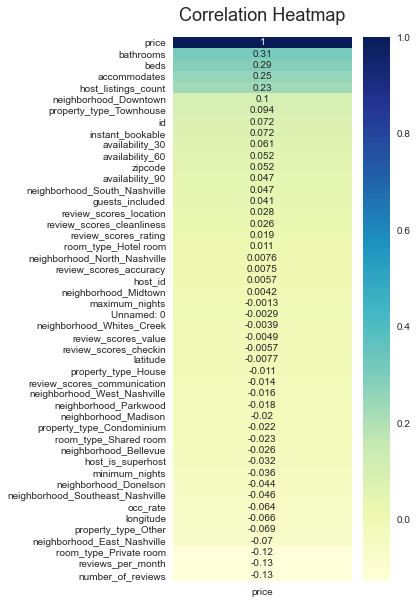

In [17]:
plt.figure(figsize=(4, 10))
#mask = np.triu(np.ones_like(regression_df.corr(), dtype=np.bool))
heatmap = sns.heatmap(airbnb_data.corr()[['price']].sort_values(by='price', ascending=False),
                       cmap='YlGnBu', annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [18]:
X_train = X_train[['bathrooms','beds','accommodates','host_listings_count']]
X_test = X_test[['bathrooms','beds','accommodates','host_listings_count']]

In [19]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [20]:
metrics.r2_score(y_train, y_hat_train)

0.17465437041776444

In [21]:
linreg_summary(X_train,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     9877.
Date:                Wed, 31 Mar 2021   Prob (F-statistic):               0.00
Time:                        10:46:47   Log-Likelihood:            -1.3994e+06
No. Observations:              186695   AIC:                         2.799e+06
Df Residuals:                  186690   BIC:                         2.799e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -19.2946      2.127     -9.070      0.000     -23.464     -15.125
bathrooms              95.5921      1.405     68.044      0.000      92.839      98.346
beds                   22.9635      0.603     38.091      0.000      21.782      24.145
accommodates           -1.5260      0.514     -2.969      0.003      -2.533      -0.519
host_listings_count     0.3686      0.003    125.851      0.000       0.363       0.374
==============================================================================
Omnibus:                   427544.796   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       4804093905.049
Skew:                          22.148   Prob(JB):                         0.00
Kurtosis:                     787.610   Cond. No.                         781.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
print('RMSE Train:',np.sqrt(metrics.mean_squared_error(y_train, y_hat_train)))
print('RMSE Test:',np.sqrt(metrics.mean_squared_error(y_test, y_hat_test)))

RMSE Train: 435.49709844179756
RMSE Test: 479.9278247611345


## Choose Model Features Using Stepwise Selection

In [26]:
y = airbnb_data['price']
X = airbnb_data.drop(['last_scraped', 'id','host_id','price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [28]:
new_x_cols = stepwise_selection(X_train, y_train, verbose=True)
print('resulting features:')
print(new_x_cols)

<ipython-input-27-3a06d07146b7>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  bathrooms                      with p-value 0.0
Add  neighborhood_Downtown          with p-value 0.0
Add  host_listings_count            with p-value 0.0
Add  beds                           with p-value 0.0
Add  guests_included                with p-value 1.11504e-96
Add  property_type_Townhouse        with p-value 1.23224e-84
Add  neighborhood_Donelson          with p-value 1.50067e-69
Add  reviews_per_month              with p-value 4.09063e-64
Add  review_scores_location         with p-value 1.1386e-72
Add  property_type_Other            with p-value 2.74769e-40
Add  neighborhood_Midtown           with p-value 2.95406e-35
Add  room_type_Hotel room           with p-value 1.43127e-31
Add  availability_30                with p-value 6.40189e-26
Add  minimum_nights                 with p-value 3.06867e-24
Add  neighborhood_South_Nashville   with p-value 3.83353e-20
Add  room_type_Shared room          with p-value 3.30866e-16
Add  review_scores_cleanliness      with p-value 7.74292e

In [29]:
X_train = X_train[new_x_cols]
X_test = X_test[new_x_cols]

In [30]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [31]:
print('R2 Score:',metrics.r2_score(y_train, y_hat_train))
print('RMSE Train:',np.sqrt(metrics.mean_squared_error(y_train, y_hat_train)))
print('RMSE Test:',np.sqrt(metrics.mean_squared_error(y_test, y_hat_test)))

R2 Score: 0.19138520143198945
RMSE Train: 431.06045244398473
RMSE Test: 475.8526031128626


In [32]:
linreg_summary(X_train,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     1636.
Date:                Wed, 31 Mar 2021   Prob (F-statistic):               0.00
Time:                        11:01:32   Log-Likelihood:            -1.3974e+06
No. Observations:              186695   AIC:                         2.795e+06
Df Residuals:                  186667   BIC:                         2.795e+06
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                             6210.9937   1241.191      5.004      0.000    3778.289    8643.699
bathrooms                           87.8299      1.332     65.919      0.000      85.218      90.441
neighborhood_Downtown               76.9865      2.932     26.260      0.000      71.240      82.733
host_listings_count                  0.3269      0.003    102.288      0.000       0.321       0.333
beds                                23.3807      0.523     44.720      0.000      22.356      24.405
guests_included                    -10.4360      0.419    -24.928      0.000     -11.257      -9.615
property_type_Townhouse             68.0972      4.292     15.866      0.000      59.685      76.510
neighborhood_Donelson              -59.1973      4.537    -13.046      0.000     -68.091     -50.304
reviews_per_month                   -6.9959      0.605    -11.562      0.000      -8.182      -5.810
review_scores_location              26.2226      1.868     14.037      0.000      22.561      29.884
property_type_Other                -32.5484      2.348    -13.860      0.000     -37.151     -27.946
neighborhood_Midtown                50.2040      4.688     10.709      0.000      41.015      59.393
room_type_Hotel room               138.5306     12.927     10.716      0.000     113.194     163.867
availability_30                      2.3823      0.196     12.143      0.000       1.998       2.767
minimum_nights                      -0.8393      0.088     -9.566      0.000      -1.011      -0.667
neighborhood_South_Nashville        21.3826      3.681      5.809      0.000      14.168      28.597
room_type_Shared room             -127.0567     14.863     -8.548      0.000    -156.188     -97.925
review_scores_cleanliness           16.7783      1.851      9.065      0.000      13.150      20.406
availability_90                     -0.5359      0.067     -8.038      0.000      -0.667      -0.405
number_of_reviews                   -0.1160      0.017     -6.756      0.000      -0.150      -0.082
room_type_Private room             -19.4838      3.143     -6.200      0.000     -25.643     -13.325
neighborhood_North_Nashville        13.6910      3.726      3.674      0.000       6.387      20.995
property_type_Condominium          -17.5020      4.158     -4.209      0.000     -25.651      -9.353
neighborhood_Southeast_Nashville   -45.3483      7.292     -6.219      0.000     -59.640     -31.057
latitude                          -180.3954     34.297     -5.260      0.000    -247.616    -113.175
neighborhood_Bellevue              -43.2272     10.396     -4.158      0.000     -63.604     -22.851
neighborhood_Whites_Creek           45.8265     11.431      4.009      0.000      23.422      68.232
review_scores_communication         -8.1225      2.43

We cannot confidently predict the price of an airbnb with the given data.

# Regression on Average Home Value

In [33]:
regression_df = pd.read_csv("cleaned_data/model_data_clean.csv", index_col=0)

In [34]:
regression_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69 entries, 2015-06-01 to 2021-02-01
Data columns (total 49 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                39 non-null     float64
 1   host_id                           39 non-null     float64
 2   host_listings_count               39 non-null     float64
 3   zipcode                           39 non-null     float64
 4   latitude                          39 non-null     float64
 5   longitude                         39 non-null     float64
 6   accommodates                      39 non-null     float64
 7   bathrooms                         39 non-null     float64
 8   beds                              39 non-null     float64
 9   price                             39 non-null     float64
 10  guests_included                   39 non-null     float64
 11  minimum_nights                    39 non-null     float64
 12

In [35]:
regression_df.head()

,id,host_id,host_listings_count,zipcode,latitude,longitude,accommodates,bathrooms,beds,price,...,neighborhood_Whites_Creek,property_type_Condominium,property_type_House,property_type_Other,property_type_Townhouse,room_type_Hotel room,room_type_Private room,room_type_Shared room,inventory,avg_home_value
2015-06-01,4.911123e+06,1.847859e+07,2.355372,37202.099174,36.161913,-86.768430,4.223140,1.450413,2.033058,163.115702,...,3.0,1.0,78.0,11.0,1.0,0.0,39.0,3.0,121,194391.913462
2015-07-01,4.585624e+06,1.588542e+07,10.465015,37202.203096,36.157222,-86.767316,4.607430,1.500310,2.308978,202.349226,...,9.0,33.0,1048.0,100.0,18.0,0.0,451.0,18.0,1615,195615.557692
2015-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,196760.903846
2015-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,198188.798077
2015-10-01,5.435875e+06,1.857827e+07,11.842180,37201.418483,36.156564,-86.767390,4.795735,1.528910,2.406161,200.524171,...,23.0,54.0,1360.0,130.0,51.0,0.0,566.0,30.0,2110,199658.365385


In [36]:
regression_df.tail()

,id,host_id,host_listings_count,zipcode,latitude,longitude,accommodates,bathrooms,beds,price,...,neighborhood_Whites_Creek,property_type_Condominium,property_type_House,property_type_Other,property_type_Townhouse,room_type_Hotel room,room_type_Private room,room_type_Shared room,inventory,avg_home_value
2020-10-01,2.947930e+07,1.089430e+08,44.070025,37202.054170,36.161081,-86.769555,6.279273,1.912799,3.715442,212.609249,...,49.0,0.0,0.0,6055.0,0.0,73.0,681.0,16.0,6055,288751.259615
2020-11-01,2.973666e+07,1.117253e+08,44.364508,37202.339950,36.160847,-86.770116,6.231287,1.907149,3.692683,211.482086,...,49.0,0.0,0.0,5945.0,0.0,74.0,652.0,18.0,5945,291187.711538
2020-12-01,3.052512e+07,1.180080e+08,45.724200,37202.158459,36.160308,-86.769276,6.198440,1.906143,3.645701,212.335529,...,47.0,0.0,0.0,6153.0,0.0,73.0,650.0,16.0,6153,293967.509615
2021-01-01,3.076685e+07,1.191460e+08,47.797448,37201.979548,36.160198,-86.769105,6.201080,1.907723,3.649215,225.319863,...,47.0,0.0,0.0,6112.0,0.0,76.0,647.0,17.0,6112,296722.163462
2021-02-01,3.122308e+07,1.220661e+08,101.710612,37202.113444,36.160366,-86.768799,6.230794,1.921143,3.665365,233.017741,...,48.0,0.0,0.0,6144.0,0.0,66.0,659.0,18.0,6144,299383.230769


In [37]:
regression_df.dropna(inplace=True)

In [38]:
regression_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, 2015-06-01 to 2021-02-01
Data columns (total 49 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                39 non-null     float64
 1   host_id                           39 non-null     float64
 2   host_listings_count               39 non-null     float64
 3   zipcode                           39 non-null     float64
 4   latitude                          39 non-null     float64
 5   longitude                         39 non-null     float64
 6   accommodates                      39 non-null     float64
 7   bathrooms                         39 non-null     float64
 8   beds                              39 non-null     float64
 9   price                             39 non-null     float64
 10  guests_included                   39 non-null     float64
 11  minimum_nights                    39 non-null     float64
 12

## Run Baseline Model

In [39]:
y = regression_df['avg_home_value']
X = regression_df.drop(['host_id','id','avg_home_value'], axis=1)

In [38]:
# y = regression_df['total_average']
# X = regression_df['inventory']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=57)

In [41]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [42]:
metrics.r2_score(y_train, y_hat_train)

1.0

In [43]:
print('RMSE Train:',np.sqrt(metrics.mean_squared_error(y_train, y_hat_train)))
print('RMSE Test:',np.sqrt(metrics.mean_squared_error(y_test, y_hat_test)))

RMSE Train: 1.8045851970825403e-08
RMSE Test: 11538.990954579995


Our model is extremely overfit to the training data.

In [44]:
linreg_summary(X_train,y_train)

C:\Users\saman\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\saman\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\saman\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\Users\saman\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1620: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         avg_home_value   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 31 Mar 2021   Prob (F-statistic):                nan
Time:                        11:04:05   Log-Likelihood:                 494.22
No. Observations:                  31   AIC:                            -926.4
Df Residuals:                       0   BIC:                            -882.0
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -0.0296        inf         -0        nan         nan         nan
host_listings_count                313.1001        inf          0        nan         nan         nan
zipcode                             -7.7760        inf         -0        nan         nan         nan
latitude                             3.5592        inf          0        nan         nan         nan
longitude                            1.8587        inf          0        nan         nan         nan
accommodates                      2330.7708        inf          0        nan         nan         nan
bathrooms                          345.8445        inf          0        nan         nan         nan
beds                              2261.1546        inf          0        nan         nan         nan
price                             -167.8463        inf         -0        nan         nan         nan
guests_included                   4930.9598        inf          0        nan         nan         nan
minimum_nights                   -1413.3001        inf         -0        nan         nan         nan
maximum_nights                       0.0029        inf          0        nan         nan         nan
availability_30                   1363.7436        inf          0        nan         nan         nan
availability_60                  -1304.2856        inf         -0        nan         nan         nan
availability_90                    413.1638        inf          0        nan         nan         nan
number_of_reviews                 1757.5614        inf          0        nan         nan         nan
review_scores_rating              4733.7514        inf          0        nan         nan         nan
review_scores_accuracy             425.1938        inf          0        nan         nan         nan
review_scores_cleanliness         -117.3679        inf         -0        nan         nan         nan
review_scores_checkin              835.8022        inf          0        nan         nan         nan
review_scores_communication        432.4382        inf          0        nan         nan         nan
review_scores_location            -111.9876        inf         -0        nan         nan         nan
review_scores_value                173.9461        inf          0        nan         nan         nan
reviews_per_month                -5101.5687        inf         -0        nan         nan         nan
occ_rate                          -978.8500        inf         -0        nan         nan         nan
host_is_superhost                   15.4196        inf          0        nan         nan         nan
instant_bookable                    -4.9206        inf         -0        nan         nan         nan
neighborhood_Bellevue              734.0936        in

Using this many features has severely overfit our data. We have more variables than datapoints.

## Run Model Using Only Most Correlated Features

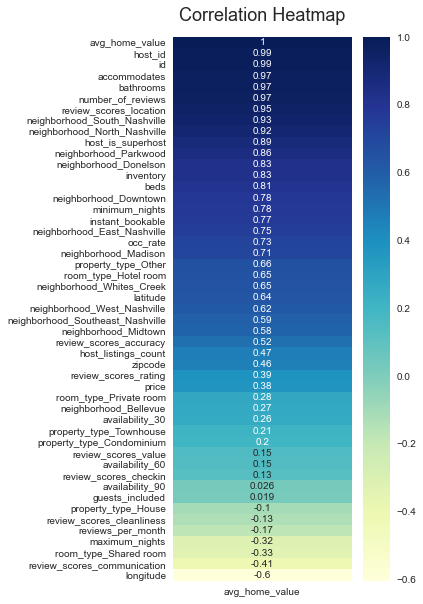

In [45]:
plt.figure(figsize=(4, 10))
#mask = np.triu(np.ones_like(regression_df.corr(), dtype=np.bool))
heatmap = sns.heatmap(regression_df.corr()[['avg_home_value']].sort_values(by='avg_home_value', ascending=False),
                       cmap='YlGnBu', annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [46]:
X_train = X_train[['bathrooms','accommodates','number_of_reviews',
                   'host_is_superhost','neighborhood_North_Nashville',
                   'neighborhood_South_Nashville','review_scores_location']]
X_test = X_test[['bathrooms','accommodates','number_of_reviews',
                   'host_is_superhost','neighborhood_North_Nashville',
                   'neighborhood_South_Nashville','review_scores_location']]

In [47]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [48]:
print('R2 Score:',metrics.r2_score(y_train, y_hat_train))
print('RMSE Train:',np.sqrt(metrics.mean_squared_error(y_train, y_hat_train)))
print('RMSE Test:',np.sqrt(metrics.mean_squared_error(y_test, y_hat_test)))

R2 Score: 0.991770375171401
RMSE Train: 2432.04817782506
RMSE Test: 2835.656798669994


Our RMSE Test and Train scores have moved much closer together, and our R2 is still extremely high.

In [49]:
linreg_summary(X_train,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         avg_home_value   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     396.0
Date:                Wed, 31 Mar 2021   Prob (F-statistic):           2.00e-22
Time:                        11:06:03   Log-Likelihood:                -285.68
No. Observations:                  31   AIC:                             587.4
Df Residuals:                      23   BIC:                             598.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                        -7.861e+05   4.06e+05     -1.937      0.065   -1.63e+06    5.36e+04
bathrooms                     6.665e+04   2.72e+04      2.451      0.022    1.04e+04    1.23e+05
accommodates                  3916.9979    1.2e+04      0.326      0.747   -2.09e+04    2.88e+04
number_of_reviews             1296.8377    441.132      2.940      0.007     384.286    2209.389
host_is_superhost              -21.1856      4.305     -4.921      0.000     -30.092     -12.280
neighborhood_North_Nashville    65.4993     23.719      2.761      0.011      16.432     114.566
neighborhood_South_Nashville    28.8309     29.698      0.971      0.342     -32.604      90.266
review_scores_location        8.794e+04   4.35e+04      2.023      0.055   -1980.340    1.78e+05
==============================================================================
Omnibus:                        0.211   Durbin-Watson:                   1.814
Prob(Omnibus):                  0.900   Jarque-Bera (JB):                0.340
Skew:                          -0.169   Prob(JB):                        0.844
Kurtosis:                       2.615   Cond. No.                     2.77e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.77e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

There are some features in this model with p-values above 0.05. Let's try using stepwise selection to select our features based on p-values instead.

## Choose Model Features Using Stepwise Selection

In [50]:
y = regression_df['avg_home_value']
X = regression_df.drop(['host_id','id','avg_home_value'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=57)

In [52]:
new_x_cols = stepwise_selection(X_train, y_train, verbose=True)
print('resulting features:')
print(new_x_cols)

<ipython-input-51-3a06d07146b7>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  beds                           with p-value 2.2177e-22
Add  occ_rate                       with p-value 3.08231e-06
Add  review_scores_rating           with p-value 1.02489e-07
resulting features:
['beds', 'occ_rate', 'review_scores_rating']


In [53]:
X_train = X_train[new_x_cols]
X_test = X_test[new_x_cols]

In [54]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [55]:
metrics.r2_score(y_train, y_hat_train)

0.9942863868357786

In [56]:
print('R2 Score:',metrics.r2_score(y_train, y_hat_train))
print('RMSE Train:',np.sqrt(metrics.mean_squared_error(y_train, y_hat_train)))
print('RMSE Test:',np.sqrt(metrics.mean_squared_error(y_test, y_hat_test)))

R2 Score: 0.9942863868357786
RMSE Train: 2026.4578366925923
RMSE Test: 33251.543207303956


Our test RMSE increased significantly. This may not be the best way to select our features.

In [58]:
linreg_summary(X_train,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         avg_home_value   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     1566.
Date:                Wed, 31 Mar 2021   Prob (F-statistic):           2.22e-30
Time:                        11:08:23   Log-Likelihood:                -280.02
No. Observations:                  31   AIC:                             568.0
Df Residuals:                      27   BIC:                             573.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1.817e+06   2.62e+05     -6.935      0.000   -2.35e+06   -1.28e+06
beds                  5.036e+04   1487.369     33.858      0.000    4.73e+04    5.34e+04
occ_rate              4.032e+04   4283.988      9.412      0.000    3.15e+04    4.91e+04
review_scores_rating  1.954e+04   2722.940      7.175      0.000    1.39e+04    2.51e+04
==============================================================================
Omnibus:                        1.506   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                0.795
Skew:                          -0.385   Prob(JB):                        0.672
Kurtosis:                       3.154   Cond. No.                     6.50e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.5e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Run Simple Regression Model Using Number of Reviews

In [62]:
y = regression_df['avg_home_value']
X = regression_df[['number_of_reviews']]

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=57)

In [64]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [65]:
print('R2 Score:',metrics.r2_score(y_train, y_hat_train))

print('RMSE Train:',np.sqrt(metrics.mean_squared_error(y_train, y_hat_train)))
print('RMSE Test:',np.sqrt(metrics.mean_squared_error(y_test, y_hat_test)))

R2 Score: 0.9408612156324989
RMSE Train: 6519.560981094953
RMSE Test: 6557.823148901785


In [66]:
linreg_summary(X_train,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         avg_home_value   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     461.4
Date:                Wed, 31 Mar 2021   Prob (F-statistic):           2.35e-19
Time:                        11:10:47   Log-Likelihood:                -316.25
No. Observations:                  31   AIC:                             636.5
Df Residuals:                      29   BIC:                             639.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.58e+05   4934.671     32.010      0.000    1.48e+05    1.68e+05
number_of_reviews  2297.4342    106.959     21.480      0.000    2078.678    2516.190
==============================================================================
Omnibus:                        4.935   Durbin-Watson:                   1.453
Prob(Omnibus):                  0.085   Jarque-Bera (JB):                3.830
Skew:                           0.856   Prob(JB):                        0.147
Kurtosis:                       3.191   Cond. No.                         188.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

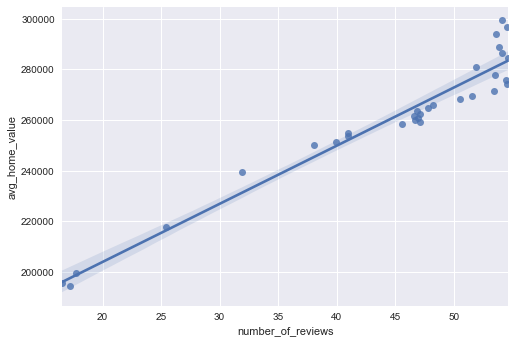

In [67]:
sns.regplot(X_train,y_train)

Using only the number of reviews, we were able to predict the average home value with 94% accuracy within $6500. Our test RMSE is also very close to our train RMSE, meaning our model is not overfit.

However, the first model we ran with the top correlated features performed strongest. We will remove the features with p-values above 0.05 and check our results.

## Run Model with Significant features from Model 2

In [69]:
y = regression_df['avg_home_value']
X = regression_df.drop(['host_id','id','avg_home_value'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=57)

In [70]:
X_train = X_train[['bathrooms','number_of_reviews',
                   'host_is_superhost','neighborhood_North_Nashville']]
X_test = X_test[['bathrooms','number_of_reviews',
                   'host_is_superhost','neighborhood_North_Nashville']]

In [71]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [72]:
print('R2 Score:',metrics.r2_score(y_train, y_hat_train))
print('RMSE Train:',np.sqrt(metrics.mean_squared_error(y_train, y_hat_train)))
print('RMSE Test:',np.sqrt(metrics.mean_squared_error(y_test, y_hat_test)))

R2 Score: 0.9899754697098497
RMSE Train: 2684.1956706591122
RMSE Test: 2991.0656250972306


In [73]:
linreg_summary(X_train,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         avg_home_value   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     641.9
Date:                Wed, 31 Mar 2021   Prob (F-statistic):           1.43e-25
Time:                        11:18:57   Log-Likelihood:                -288.74
No. Observations:                  31   AIC:                             587.5
Df Residuals:                      26   BIC:                             594.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         6569.8957   1.65e+04      0.397      0.694   -2.74e+04    4.06e+04
bathrooms                     1.129e+05   1.38e+04      8.198      0.000    8.46e+04    1.41e+05
number_of_reviews             1343.5731    349.365      3.846      0.001     625.442    2061.704
host_is_superhost              -15.2259      2.832     -5.376      0.000     -21.048      -9.404
neighborhood_North_Nashville    75.1344     19.492      3.855      0.001      35.067     115.201
==============================================================================
Omnibus:                        1.869   Durbin-Watson:                   1.552
Prob(Omnibus):                  0.393   Jarque-Bera (JB):                1.605
Skew:                          -0.425   Prob(JB):                        0.448
Kurtosis:                       2.278   Cond. No.                     1.35e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We are able to obtain our best RMSE scores from running the model with these features.

In [74]:
feature_cols = ['bathrooms','number_of_reviews',
                'host_is_superhost','neighborhood_North_Nashville']

In [75]:
y = regression_df['avg_home_value']
X = regression_df[feature_cols]
final_reg_features_df = pd.concat([y,X], axis=1)

In [76]:
final_reg_features_df

,avg_home_value,bathrooms,number_of_reviews,host_is_superhost,neighborhood_North_Nashville
2015-06-01,194391.913462,1.450413,17.206612,23,6.0
2015-07-01,195615.557692,1.500310,16.536223,285,49.0
2015-10-01,199658.365385,1.528910,17.715640,434,76.0
2016-09-01,217725.894231,1.573390,25.443699,974,176.0
2017-09-01,239449.740385,1.650038,31.943173,1961,454.0
2018-04-01,250327.384615,1.689675,38.099596,2376,484.0
2018-05-01,251465.682692,1.684571,39.961143,2379,494.0
2018-07-01,253835.615385,1.705656,40.941241,2666,511.0
2018-08-01,255036.875000,1.703250,40.988182,2738,540.0
2018-09-01,256133.490385,1.696141,42.363731,2718,523.0


In [77]:
final_reg_features_df.to_csv("cleaned_data/final_reg_features.csv")

# STOP HERE

## Explore Multicollinearity, then perform Stepwise Selection

In [59]:
X = X[new_x_cols]

In [60]:
#X = regression_df.drop(['host_id','avg_home_value'], axis=1)
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(X.columns, vif))

[('beds', 133.20818545593443),
 ('occ_rate', 67.45445771862147),
 ('review_scores_rating', 56.50696138604927)]

In [61]:
vif_scores = list(zip(X.columns, vif))
multi_co_cols = [x for x,vif in vif_scores if vif > 10]
multi_co_cols

['beds', 'occ_rate', 'review_scores_rating']

In [36]:
import statsmodels.formula.api as smf
simple_reg_model = smf.ols(formula='total_average ~ inventory', data=regression_df).fit()

In [37]:
print(simple_reg_model.params)
display(simple_reg_model.conf_int())
# null hypothesis 
print('p-values: ')
print(simple_reg_model.pvalues)
print('r-squared: '+ str(simple_reg_model.rsquared))

Intercept    243935.058927
inventory        16.056183
dtype: float64


,0,1
Intercept,219720.485007,268149.632848
inventory,12.150981,19.961384


p-values: 
Intercept    9.886676e-22
inventory    5.191057e-10
dtype: float64
r-squared: 0.6522554516824053


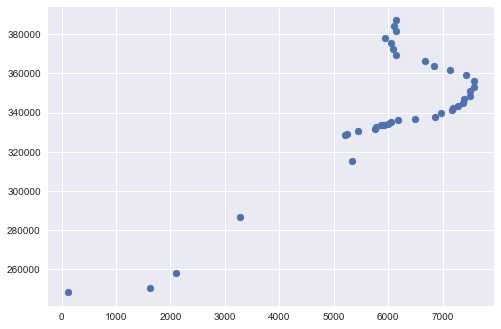

In [44]:
plt.scatter(X,y)

In [28]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [29]:
new_x_cols = stepwise_selection(X_train, y_train, verbose=False)
print('resulting features:')
print(new_x_cols)

<ipython-input-28-3a06d07146b7>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


resulting features:
['beds']


In [68]:
df_pairs=regression_df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df_pairs['pairs'] = list(zip(df_pairs.level_0, df_pairs.level_1))

# set index to pairs
df_pairs.set_index(['pairs'], inplace = True)

#d rop level columns
df_pairs.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df_pairs.columns = ['cc']

# drop duplicates. 
df_pairs.drop_duplicates(inplace=True)

In [69]:
df_pairs[(df_pairs.cc>.75) & (df_pairs.cc <1)]

,cc
pairs,
"(host_is_superhost, number_of_reviews)",0.988556
"(room_type_Private room, accommodates)",0.987133
"(property_type_Townhouse, property_type_Condominium)",0.984592
"(room_type_Private room, host_is_superhost)",0.981423
"(room_type_Private room, number_of_reviews)",0.981331
...,...
"(neighborhood_West_Nashville, host_is_superhost)",0.753827
"(review_scores_rating, review_scores_value)",0.753225
"(inventory, bathrooms)",0.751174


In [34]:
#X = regression_df.drop(['total_average'], axis=1)
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(X.columns, vif))

[('zipcode', 715259843.1212648),
 ('latitude', 5457073078.292448),
 ('longitude', 6564502079.45954),
 ('accommodates', 22771.63979053534),
 ('bathrooms', 10842.413959299245),
 ('bedrooms', 5500.522294833365),
 ('beds', 8880.791590580611),
 ('price', 985.9804349733819),
 ('guests_included', 2423.499957960968),
 ('minimum_nights', 68.88862950081703),
 ('maximum_nights', 2.143976185425021),
 ('number_of_reviews', 1559.0167982996509),
 ('inventory', 554.9645190228075)]

## total_average vs. number of reviews

In [45]:
y = regression_df['total_average']
X = regression_df['number_of_reviews']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=57)

In [50]:
simple_reg_model = smf.ols(formula='total_average ~ number_of_reviews', data=regression_df).fit()

In [51]:
print(simple_reg_model.params)
display(simple_reg_model.conf_int())
# null hypothesis 


Intercept            206414.964047
number_of_reviews      2914.870325
dtype: float64


,0,1
Intercept,191325.628949,221504.299144
number_of_reviews,2593.997965,3235.742685


In [52]:
print('p-values: ')
print(simple_reg_model.pvalues)
print('r-squared: '+ str(simple_reg_model.rsquared))

p-values: 
Intercept            2.380020e-26
number_of_reviews    3.246172e-20
dtype: float64
r-squared: 0.9015417083368342


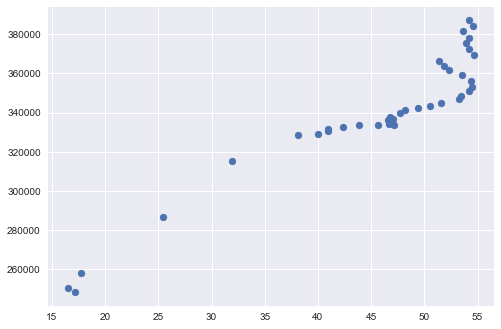

In [53]:
plt.scatter(X,y)

In [54]:
simple_reg_model = smf.ols(formula='total_average ~ accommodates', data=regression_df).fit()

In [55]:
print(simple_reg_model.params)
display(simple_reg_model.conf_int())
# null hypothesis 


Intercept      -56454.606231
accommodates    67922.084958
dtype: float64


,0,1
Intercept,-89575.110571,-23334.101891
accommodates,62265.675887,73578.494030


In [56]:
print('p-values: ')
print(simple_reg_model.pvalues)
print('r-squared: '+ str(simple_reg_model.rsquared))

p-values: 
Intercept       1.401787e-03
accommodates    2.314294e-24
dtype: float64
r-squared: 0.9411739313529919


### Correlation Heatmap

In [65]:
np.triu(np.ones_like(regression_df.corr()))

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0.

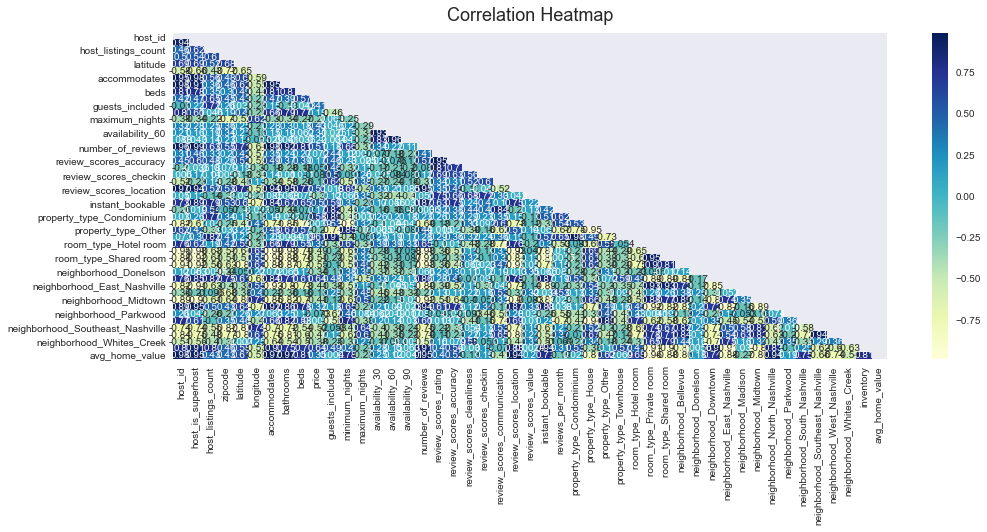

In [70]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(regression_df.corr(), dtype=np.bool))
heatmap = sns.heatmap(regression_df.corr(), mask=mask, cmap='YlGnBu', annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

In [ ]:
regression_df.corr()[['total_average']].sort_values(by='total_average', ascending=False)

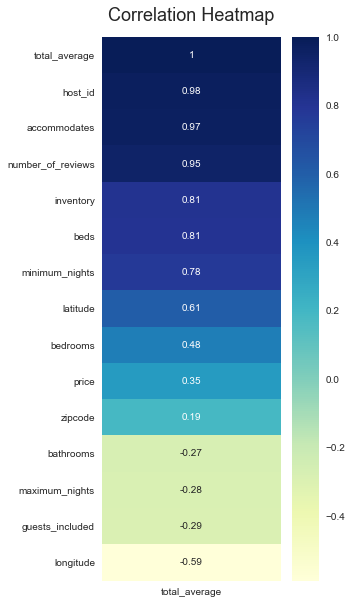

In [72]:
plt.figure(figsize=(4, 10))
#mask = np.triu(np.ones_like(regression_df.corr(), dtype=np.bool))
heatmap = sns.heatmap(regression_df.corr()[['total_average']].sort_values(by='total_average', ascending=False),
                       cmap='YlGnBu', annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

### Simple Linear Regression

#### Pairplots

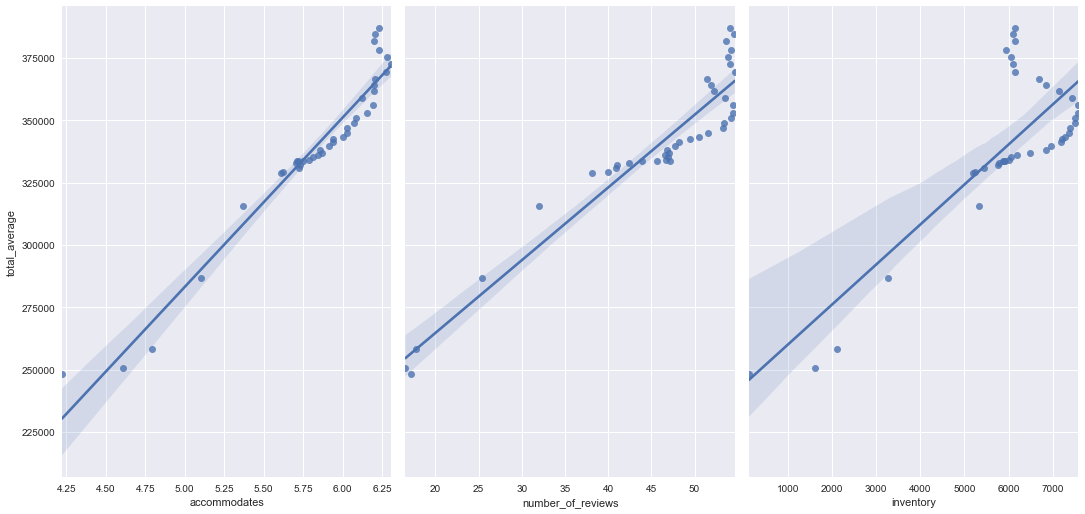

In [76]:
sns.pairplot(regression_df, x_vars=['accommodates','number_of_reviews','inventory'], 
             y_vars='total_average', height=7, aspect=0.7, kind='reg');

The relationship does not appear to be linear. There are also very limited number of datapoints under $300k.


#### Inventory

In [71]:
def run_ols_model(outcome, predictors):
    formula = outcome+'~'+predictors
    model = ols(formula=formula, data=regression_df).fit()
    return model.summary()

In [72]:
outcome = 'avg_home_value'
predictors = 'inventory'
run_ols_model(outcome, predictors)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         avg_home_value   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     69.68
Date:                Mon, 29 Mar 2021   Prob (F-statistic):           4.94e-10
Time:                        10:51:25   Log-Likelihood:                -439.58
No. Observations:                  39   AIC:                             883.2
Df Residuals:                      37   BIC:                             886.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.438e+05   1.19e+04     20.424      0.000     2.2e+05    2.68e+05
inventory     16.0744      1.926      8.348      0.000      12.173      19.976
==============================================================================
Omnibus:                        8.833   Durbin-Watson:                   0.089
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                8.822
Skew:                           1.164   Prob(JB):                       0.0121
Kurtosis:                       3.072   Cond. No.                     2.37e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Number of Reviews

In [73]:
outcome = 'avg_home_value'
predictors = 'number_of_reviews'
run_ols_model(outcome, predictors)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         avg_home_value   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     336.0
Date:                Mon, 29 Mar 2021   Prob (F-statistic):           3.72e-20
Time:                        10:51:27   Log-Likelihood:                -415.17
No. Observations:                  39   AIC:                             834.3
Df Residuals:                      37   BIC:                             837.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          2.065e+05   7474.892     27.621      0.000    1.91e+05    2.22e+05
number_of_reviews  2913.4966    158.940     18.331      0.000    2591.454    3235.539
==============================================================================
Omnibus:                        3.544   Durbin-Watson:                   0.138
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.687
Skew:                           0.499   Prob(JB):                        0.261
Kurtosis:                       2.190   Cond. No.                         211.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Accommodates

In [74]:
outcome = 'avg_home_value'
predictors = 'accommodates'
run_ols_model(outcome, predictors)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         avg_home_value   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     590.1
Date:                Mon, 29 Mar 2021   Prob (F-statistic):           2.45e-24
Time:                        10:51:28   Log-Likelihood:                -405.04
No. Observations:                  39   AIC:                             814.1
Df Residuals:                      37   BIC:                             817.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -5.669e+04   1.64e+04     -3.461      0.001   -8.99e+04   -2.35e+04
accommodates  6.797e+04   2798.136     24.292      0.000    6.23e+04    7.36e+04
==============================================================================
Omnibus:                       11.548   Durbin-Watson:                   0.435
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.239
Skew:                           1.245   Prob(JB):                      0.00363
Kurtosis:                       3.848   Cond. No.                         76.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Multiple Linear Regression

#### All three

In [75]:
outcome = 'avg_home_value'
x_cols = ['number_of_reviews','accommodates', 'inventory']
predictors = '+'.join(x_cols)
run_ols_model(outcome, predictors)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         avg_home_value   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     351.7
Date:                Mon, 29 Mar 2021   Prob (F-statistic):           3.48e-26
Time:                        10:52:08   Log-Likelihood:                -393.17
No. Observations:                  39   AIC:                             794.3
Df Residuals:                      35   BIC:                             801.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -7.161e+04   3.78e+04     -1.895      0.066   -1.48e+05    5096.070
number_of_reviews  1000.6406    443.795      2.255      0.031      99.689    1901.592
accommodates       7.077e+04   9650.959      7.333      0.000    5.12e+04    9.04e+04
inventory            -7.9069      1.466     -5.393      0.000     -10.883      -4.931
==============================================================================
Omnibus:                        7.266   Durbin-Watson:                   0.891
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                5.913
Skew:                           0.828   Prob(JB):                       0.0520
Kurtosis:                       3.946   Cond. No.                     2.47e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### All Predictors

#### Feature Importance Graph

#### Stepwise Selection

In [ ]:
#